1


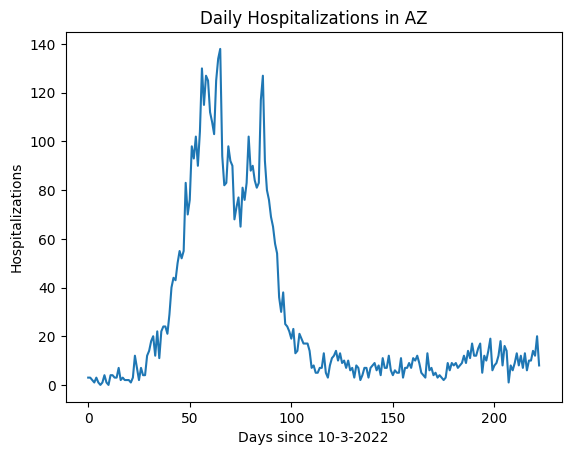

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\avery\\PF-Estimation\\PF_Estimation\\data_sets\\COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv")
df = df.sort_values(by='date')
AZ_DATA = [];
AZ_DATA_2223 = [];
state = "AZ"
for i in range(63779):
  if(df.iloc[i]['state'] == state):
    AZ_DATA.append(df.iloc[i]);
for i in range(len(AZ_DATA)):
  d = (datetime.datetime.strptime(AZ_DATA[i]['date'],'%Y/%m/%d'));
  if(d > datetime.datetime(2022,10,3) and d < datetime.datetime(2023,5,15)):
    AZ_DATA_2223.append(AZ_DATA[i]);
hosp = [];
first_day_of_data = 0
#previous_day_admission_influenza_confirmed
#previous_day_admission_adult_covid_confirmed
#total_patients_hospitalized_confirmed_influenza
for i in range(len(AZ_DATA_2223)):
  if(pd.isna(AZ_DATA_2223[i]['previous_day_admission_influenza_confirmed'])):
    hosp.append(0);
  else: 
    hosp.append(int(AZ_DATA_2223[i]['previous_day_admission_influenza_confirmed']));
    if(first_day_of_data == 0): 
      first_day_of_data = i; 
print(first_day_of_data)
plt.ylabel("Hospitalizations")
plt.xlabel("Days since 10-3-2022")
plt.title("Daily Hospitalizations in "+ state)
plt.plot(hosp);
df2 = pd.DataFrame(hosp);
df2.to_csv(f'../datasets/{state}_FLU_HOSPITALIZATIONS.csv');